## Libraries and huggingface login

In [15]:
import torch
import time
from datasets import load_dataset
from transformers import AutoTokenizer
from gptqmodel import GPTQModel, QuantizeConfig
from gptqmodel.utils import Perplexity
import matplotlib.pyplot as plt
import numpy as np
import gc
import utils_LM
import importlib
import utils
import os

In [3]:
from huggingface_hub import login
login()

## Quantization of model for all the bit configurations [2, 3, 4, 8]

In [39]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
print("LOADING DATASET")
traindataset = utils_LM.get_wikitext2(tokenizer, nsamples=256, seqlen=1024)
print("DATASET LOADED")
utils.quantize_for_all_bits_precision("wikiText_models",traindataset, model_id, "wikiText")

LOADING DATASET
DATASET LOADED


WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 4 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.62014', 'damp': '0.01000', 'time': '1.384'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.01660', 'damp': '0.01000', 'time': '1.370'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '1.27480', 'damp': '0.01000', 'time': '1.234'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00164', 'damp': '0.01000', 'time': '1.051'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '1.13989', 'damp': '0.01000', 'time': '1.122'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '1.43341', 'damp': '0.01000', 'time': '1.100'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00756', 'damp': '0.01000', 'time': '4.789'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:01:56 / 0:15:28 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '1.05103', 'damp': '0.01000', 'time': '1.004'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.06223', 'damp': '0.01000', 'time': '1.141'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '2.02254', 'damp': '0.01000', 'time': '1.197'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00474', 'damp': '0.01000', 'time': '1.046'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '1.67089', 'damp': '0.01000', 'time': '1.072'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '2.28826', 'damp': '0.01000', 'time': '1.074'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '5.47714', 'damp': '0.01000', 'time': '4.606'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:03:54 / 0:20:48 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '2.13145', 'damp': '0.01000', 'time': '0.951'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.14697', 'damp': '0.01000', 'time': '1.145'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '4.06626', 'damp': '0.01000', 'time': '1.424'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00621', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '2.17195', 'damp': '0.01000', 'time': '1.026'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '3.43811', 'damp': '0.01000', 'time': '0.980'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.02579', 'damp': '0.01000', 'time': '4.556'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:05:57 / 0:23:48 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '1.39290', 'damp': '0.01000', 'time': '1.059'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.18991', 'damp': '0.01000', 'time': '1.068'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '3.04391', 'damp': '0.01000', 'time': '1.220'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.01221', 'damp': '0.01000', 'time': '1.026'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '2.57169', 'damp': '0.01000', 'time': '1.065'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '5.09807', 'damp': '0.01000', 'time': '1.125'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.03694', 'damp': '0.01000', 'time': '4.737'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:07:55 / 0:25:20 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '1.42607', 'damp': '0.01000', 'time': '0.969'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.17019', 'damp': '0.01000', 'time': '0.984'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '2.95491', 'damp': '0.01000', 'time': '1.003'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.01923', 'damp': '0.01000', 'time': '1.038'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '2.50548', 'damp': '0.01000', 'time': '0.980'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '5.38534', 'damp': '0.01000', 'time': '0.967'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.04074', 'damp': '0.01000', 'time': '4.251'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:09:50 / 0:26:13 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '2.17936', 'damp': '0.01000', 'time': '1.163'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.14247', 'damp': '0.01000', 'time': '1.247'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '3.71173', 'damp': '0.01000', 'time': '1.231'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.01942', 'damp': '0.01000', 'time': '1.094'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '2.64294', 'damp': '0.01000', 'time': '1.057'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '4.85856', 'damp': '0.01000', 'time': '1.181'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.04861', 'damp': '0.01000', 'time': '4.802'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:11:50 / 0:27:02 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '1.64679', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.18011', 'damp': '0.01000', 'time': '1.019'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '2.62159', 'damp': '0.01000', 'time': '1.126'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.03072', 'damp': '0.01000', 'time': '0.978'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '2.65523', 'damp': '0.01000', 'time': '1.109'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '4.75024', 'damp': '0.01000', 'time': '1.226'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.04964', 'damp': '0.01000', 'time': '4.396'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:13:45 / 0:27:30 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '1.61762', 'damp': '0.01000', 'time': '0.921'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.20405', 'damp': '0.01000', 'time': '0.935'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '3.05333', 'damp': '0.01000', 'time': '1.052'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.02708', 'damp': '0.01000', 'time': '0.942'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '2.69283', 'damp': '0.01000', 'time': '0.958'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '4.34144', 'damp': '0.01000', 'time': '1.120'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.05376', 'damp': '0.01000', 'time': '4.322'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:15:39 / 0:27:49 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '1.89474', 'damp': '0.01000', 'time': '0.920'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.19292', 'damp': '0.01000', 'time': '1.009'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '3.12245', 'damp': '0.01000', 'time': '1.110'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.03453', 'damp': '0.01000', 'time': '0.929'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '2.95268', 'damp': '0.01000', 'time': '1.095'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '4.62903', 'damp': '0.01000', 'time': '1.103'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.07173', 'damp': '0.01000', 'time': '4.173'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:17:33 / 0:28:04 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '1.53122', 'damp': '0.01000', 'time': '0.899'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.23447', 'damp': '0.01000', 'time': '0.926'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '3.73604', 'damp': '0.01000', 'time': '1.153'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.04613', 'damp': '0.01000', 'time': '0.981'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '3.08657', 'damp': '0.01000', 'time': '0.962'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '5.01843', 'damp': '0.01000', 'time': '1.067'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.08492', 'damp': '0.01000', 'time': '4.239'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:19:26 / 0:28:16 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '1.83477', 'damp': '0.01000', 'time': '0.902'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.25994', 'damp': '0.01000', 'time': '0.931'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '3.84458', 'damp': '0.01000', 'time': '1.154'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.03127', 'damp': '0.01000', 'time': '0.911'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '3.71283', 'damp': '0.01000', 'time': '0.979'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '5.81468', 'damp': '0.01000', 'time': '1.033'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.11023', 'damp': '0.01000', 'time': '4.200'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:21:19 / 0:28:25 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '2.29956', 'damp': '0.01000', 'time': '0.898'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.27798', 'damp': '0.01000', 'time': '0.889'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '3.92013', 'damp': '0.01000', 'time': '1.041'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.02644', 'damp': '0.01000', 'time': '0.902'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '4.22150', 'damp': '0.01000', 'time': '0.960'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '6.47687', 'damp': '0.01000', 'time': '1.191'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.12065', 'damp': '0.01000', 'time': '4.458'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:23:12 / 0:28:33 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '2.36638', 'damp': '0.01000', 'time': '0.860'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.28494', 'damp': '0.01000', 'time': '0.873'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '3.97809', 'damp': '0.01000', 'time': '1.063'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.02573', 'damp': '0.01000', 'time': '0.868'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '4.40740', 'damp': '0.01000', 'time': '0.898'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '6.40871', 'damp': '0.01000', 'time': '1.070'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.13805', 'damp': '0.01000', 'time': '3.996'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:25:04 / 0:28:38 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '2.33875', 'damp': '0.01000', 'time': '0.867'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.47960', 'damp': '0.01000', 'time': '0.873'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '4.59054', 'damp': '0.01000', 'time': '1.036'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.03183', 'damp': '0.01000', 'time': '0.934'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '5.22019', 'damp': '0.01000', 'time': '0.891'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '6.94502', 'damp': '0.01000', 'time': '0.947'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.20137', 'damp': '0.01000', 'time': '4.410'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:26:57 / 0:28:44 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '2.65161', 'damp': '0.01000', 'time': '1.052'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '1.07387', 'damp': '0.01000', 'time': '0.907'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '4.85614', 'damp': '0.01000', 'time': '1.012'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.07184', 'damp': '0.01000', 'time': '0.889'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '5.95376', 'damp': '0.01000', 'time': '0.971'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '8.56094', 'damp': '0.01000', 'time': '0.961'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.26770', 'damp': '0.01000', 'time': '4.191'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:28:49 / 0:28:49 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '2.52383', 'damp': '0.01000', 'time': '1.036'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '1.06734', 'damp': '0.01000', 'time': '1.039'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '4.41432', 'damp': '0.01000', 'time': '1.133'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.37918', 'damp': '0.01000', 'time': '0.880'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '7.41926', 'damp': '0.01000', 'time': '0.942'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '9.79895', 'damp': '0.01000', 'time': '0.995'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.64739', 'damp': '0.01000', 'time': '4.212'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.62014', 'damp': '0.01000', 'time': '1.384'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.01660', 'damp': '0.01000', 'time': '1.370'}, {'layer': 0, 'module': 'self_attn.q_proj'

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%2 / 2:14:24 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1485.55MB, 1.45GB
INFO - Size difference: 3228.77MB, 3.15GB - 68.49%
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 8 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.00212', 'damp': '0.01000', 'time': '1.374'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00006', 'damp': '0.01000', 'time': '1.366'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '0.00436', 'damp': '0.01000', 'time': '1.190'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00001', 'damp': '0.01000', 'time': '0.987'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '0.00392', 'damp': '0.01000', 'time': '0.976'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '0.00493', 'damp': '0.01000', 'time': '1.114'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00003', 'damp': '0.01000', 'time': '4.383'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:01:54 / 0:15:12 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '0.00357', 'damp': '0.01000', 'time': '0.898'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.00021', 'damp': '0.01000', 'time': '0.920'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '0.00688', 'damp': '0.01000', 'time': '0.989'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.900'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '0.00573', 'damp': '0.01000', 'time': '0.964'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '0.00785', 'damp': '0.01000', 'time': '0.967'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '0.00274', 'damp': '0.01000', 'time': '4.260'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:03:47 / 0:20:10 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '0.00734', 'damp': '0.01000', 'time': '1.241'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.00051', 'damp': '0.01000', 'time': '1.156'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '0.01404', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.917'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '0.00747', 'damp': '0.01000', 'time': '0.979'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '0.01184', 'damp': '0.01000', 'time': '0.954'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.00009', 'damp': '0.01000', 'time': '4.387'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:05:40 / 0:22:40 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '0.00464', 'damp': '0.01000', 'time': '0.868'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.00064', 'damp': '0.01000', 'time': '0.963'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '0.01019', 'damp': '0.01000', 'time': '0.991'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.00004', 'damp': '0.01000', 'time': '0.892'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '0.00871', 'damp': '0.01000', 'time': '1.143'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '0.01724', 'damp': '0.01000', 'time': '1.059'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.00013', 'damp': '0.01000', 'time': '4.204'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:07:33 / 0:24:09 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '0.00474', 'damp': '0.01000', 'time': '1.149'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.00057', 'damp': '0.01000', 'time': '0.957'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '0.00985', 'damp': '0.01000', 'time': '1.140'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.00007', 'damp': '0.01000', 'time': '0.936'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '0.00852', 'damp': '0.01000', 'time': '1.068'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '0.01827', 'damp': '0.01000', 'time': '0.975'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.00014', 'damp': '0.01000', 'time': '4.097'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:09:27 / 0:25:12 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '0.00728', 'damp': '0.01000', 'time': '0.987'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.00048', 'damp': '0.01000', 'time': '1.088'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '0.01225', 'damp': '0.01000', 'time': '1.260'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.00007', 'damp': '0.01000', 'time': '0.885'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '0.00896', 'damp': '0.01000', 'time': '0.969'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '0.01642', 'damp': '0.01000', 'time': '0.990'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.00017', 'damp': '0.01000', 'time': '3.917'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:11:19 / 0:25:52 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '0.00550', 'damp': '0.01000', 'time': '0.884'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.00061', 'damp': '0.01000', 'time': '1.074'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '0.00877', 'damp': '0.01000', 'time': '0.992'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.00010', 'damp': '0.01000', 'time': '1.095'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '0.00898', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '0.01606', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.00017', 'damp': '0.01000', 'time': '4.068'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:13:12 / 0:26:24 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '0.00538', 'damp': '0.01000', 'time': '0.935'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.00069', 'damp': '0.01000', 'time': '0.945'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '0.01020', 'damp': '0.01000', 'time': '1.073'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.00009', 'damp': '0.01000', 'time': '0.917'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '0.00910', 'damp': '0.01000', 'time': '0.962'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '0.01470', 'damp': '0.01000', 'time': '1.060'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.00018', 'damp': '0.01000', 'time': '4.319'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:15:05 / 0:26:48 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '0.00634', 'damp': '0.01000', 'time': '1.012'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.00065', 'damp': '0.01000', 'time': '1.088'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '0.01048', 'damp': '0.01000', 'time': '1.115'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.00012', 'damp': '0.01000', 'time': '0.959'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '0.00999', 'damp': '0.01000', 'time': '0.998'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '0.01565', 'damp': '0.01000', 'time': '1.140'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.00024', 'damp': '0.01000', 'time': '4.375'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:16:57 / 0:27:07 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '0.00513', 'damp': '0.01000', 'time': '1.061'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.00079', 'damp': '0.01000', 'time': '0.951'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '0.01255', 'damp': '0.01000', 'time': '0.996'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.00016', 'damp': '0.01000', 'time': '0.943'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '0.01046', 'damp': '0.01000', 'time': '0.949'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '0.01698', 'damp': '0.01000', 'time': '1.163'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.00029', 'damp': '0.01000', 'time': '4.339'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:18:50 / 0:27:23 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '0.00620', 'damp': '0.01000', 'time': '0.949'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.00092', 'damp': '0.01000', 'time': '0.990'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '0.01298', 'damp': '0.01000', 'time': '1.039'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.00011', 'damp': '0.01000', 'time': '0.950'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '0.01261', 'damp': '0.01000', 'time': '0.954'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '0.01974', 'damp': '0.01000', 'time': '1.051'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.00038', 'damp': '0.01000', 'time': '4.645'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:20:43 / 0:27:37 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '0.00777', 'damp': '0.01000', 'time': '0.905'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.00096', 'damp': '0.01000', 'time': '0.987'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '0.01328', 'damp': '0.01000', 'time': '1.163'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.00009', 'damp': '0.01000', 'time': '0.912'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '0.01441', 'damp': '0.01000', 'time': '0.975'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '0.02210', 'damp': '0.01000', 'time': '1.033'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.00042', 'damp': '0.01000', 'time': '4.163'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:22:35 / 0:27:47 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '0.00809', 'damp': '0.01000', 'time': '0.946'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.00098', 'damp': '0.01000', 'time': '0.950'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '0.01353', 'damp': '0.01000', 'time': '1.031'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.00009', 'damp': '0.01000', 'time': '0.983'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '0.01514', 'damp': '0.01000', 'time': '1.024'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '0.02201', 'damp': '0.01000', 'time': '1.040'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.00048', 'damp': '0.01000', 'time': '4.588'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:24:28 / 0:27:57 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '0.00799', 'damp': '0.01000', 'time': '0.950'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.00168', 'damp': '0.01000', 'time': '0.983'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '0.01570', 'damp': '0.01000', 'time': '1.121'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.00011', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '0.01801', 'damp': '0.01000', 'time': '0.970'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '0.02394', 'damp': '0.01000', 'time': '0.987'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.00070', 'damp': '0.01000', 'time': '4.482'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:26:21 / 0:28:06 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '0.00904', 'damp': '0.01000', 'time': '1.074'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '0.00395', 'damp': '0.01000', 'time': '1.171'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '0.01656', 'damp': '0.01000', 'time': '1.099'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.00024', 'damp': '0.01000', 'time': '0.906'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '0.02054', 'damp': '0.01000', 'time': '0.959'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '0.02956', 'damp': '0.01000', 'time': '1.016'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.00093', 'damp': '0.01000', 'time': '4.258'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:28:14 / 0:28:14 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '0.00867', 'damp': '0.01000', 'time': '1.065'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '0.00374', 'damp': '0.01000', 'time': '1.166'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '0.01511', 'damp': '0.01000', 'time': '1.046'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.00132', 'damp': '0.01000', 'time': '0.935'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '0.02557', 'damp': '0.01000', 'time': '1.135'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '0.03385', 'damp': '0.01000', 'time': '1.129'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.00231', 'damp': '0.01000', 'time': '4.145'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.00212', 'damp': '0.01000', 'time': '1.374'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00006', 'damp': '0.01000', 'time': '1.366'}, {'layer': 0, 'module': 'self_attn.q_proj'

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%1 / 2:12:32 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1953.18MB, 1.91GB
INFO - Size difference: 2761.14MB, 2.70GB - 58.57%


## Testing the model's ability to generate text

In [28]:
importlib.reload(utils_LM)

utils.set_seed(42)
llama_path = "meta-llama/Llama-3.2-1B-Instruct"
list_files = os.listdir("wikiText_models")
tokenizer = AutoTokenizer.from_pretrained(llama_path)
test_data = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
utils_LM.compute_results_for_all_bits(llama_path, tokenizer, list_files, test_data)

Tokenizer loaded!


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating for 2bit model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating for 3bit model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating for 4bit model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Evaluating for 8bit model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


## Computing Perplexity for all quantization configurations

COMPUTING PERPLEXITY FOR NON QUANTIZED MODEL


Parameter 'function'=<function Perplexity._prepare_data.<locals>.<lambda> at 0x00000247DEF30220> of the transform datasets.arrow_dataset.Dataset.filter@2.0.1 couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Filter:   0%|          | 0/4358 [00:00<?, ? examples/s]

 Perplexity: 14.5253 |----------------------------------------| 100.0%0 / 0:05:40 [399/399] 100.0%COMPUTING PERPLEXITY FOR 2bit BITS


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.


 Perplexity: 4713.0921 |----------------------------------------| 100.0%5 / 0:01:15 [399/399] 100.0%COMPUTING PERPLEXITY FOR 3bit BITS


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.


 Perplexity: 28.6991 |----------------------------------------| 100.0%4 / 0:01:54 [399/399] 100.0%COMPUTING PERPLEXITY FOR 4bit BITS


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.


 Perplexity: 18.8967 |----------------------------------------| 100.0%8 / 0:01:18 [399/399] 100.0%COMPUTING PERPLEXITY FOR 8bit BITS


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.


 Perplexity: 17.3995 |----------------------------------------| 100.0%7 / 0:01:27 [399/399] 100.0%dict_keys([0, 1, 2, 3, 4])


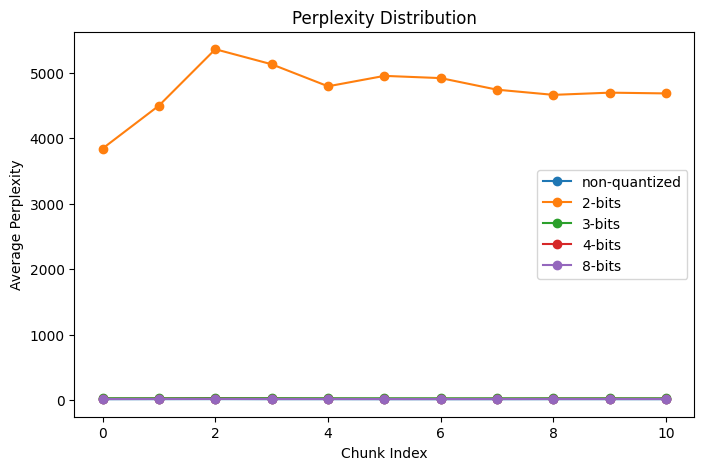

<Figure size 640x480 with 0 Axes>

In [11]:
list_files = os.listdir("wikiText_models")
model_id = "meta-llama/Llama-3.2-1B-Instruct"
ppl_distributions = utils_LM.compute_ppl_distribution_for_all_bits(model_id, list_files)

configurations = {
        0: 'non-quantized',
        1: '2-bits',
        2: '3-bits',
        3: '4-bits',
        4: '8-bits',
    }
utils_LM.show_distributions(ppl_distributions, configurations)

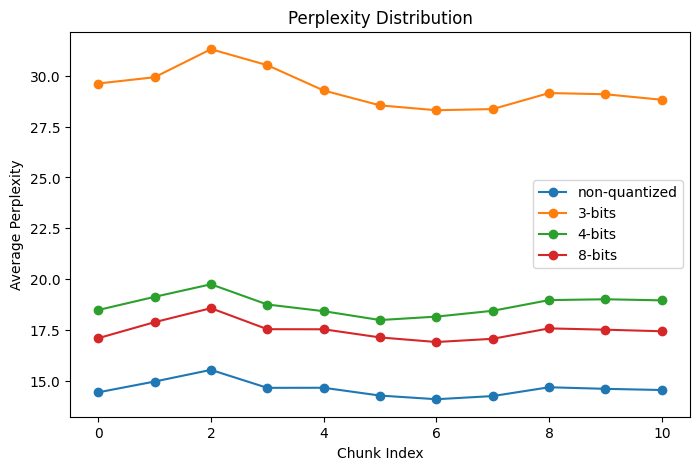

<Figure size 640x480 with 0 Axes>

In [13]:
configurations = {
        0: 'non-quantized',
        #1: '2-bits',
        2: '3-bits',
        3: '4-bits',
        4: '8-bits',
    }

utils_LM.show_distributions(ppl_distributions, configurations)

## Speedup Computation

In [36]:
importlib.reload(utils_LM)
list_files = os.listdir("wikiText_models")
quantized_times = utils_LM.measure_token_generation_speed_for_all_bits(model_id, list_files)

model.model.embed_tokens.weight: torch.bfloat16


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


COMPUTING SPEED FOR NON QUANTIZED MODEL


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


COMPUTING PERPLEXITY FOR 2bit


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


model.model.embed_tokens.weight: torch.float16


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


COMPUTING PERPLEXITY FOR 3bit


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


model.model.embed_tokens.weight: torch.float16


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


COMPUTING PERPLEXITY FOR 4bit


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


model.model.embed_tokens.weight: torch.float16


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


COMPUTING PERPLEXITY FOR 8bit


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


model.model.embed_tokens.weight: torch.float16


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Non-quantized model average inference time: 2.3928 seconds per generation
Tokens per second for non quantized model: 11.28
CONSIDERING MODEL QUANTIZED WITH 8bit
model average inference time: 0.8126 seconds per generation
Speedup is : 2.94 times
Tokens per second for non quantized model: 33.23
CONSIDERING MODEL QUANTIZED WITH 4bit
model average inference time: 0.7181 seconds per generation
Speedup is : 3.33 times
Tokens per second for non quantized model: 37.60
CONSIDERING MODEL QUANTIZED WITH 3bit
model average inference time: 1.1166 seconds per generation
Speedup is : 2.14 times
Tokens per second for non quantized model: 24.18
CONSIDERING MODEL QUANTIZED WITH 2bit
model average inference time: 0.6976 seconds per generation
Speedup is : 3.43 times
Tokens per second for non quantized model: 38.71


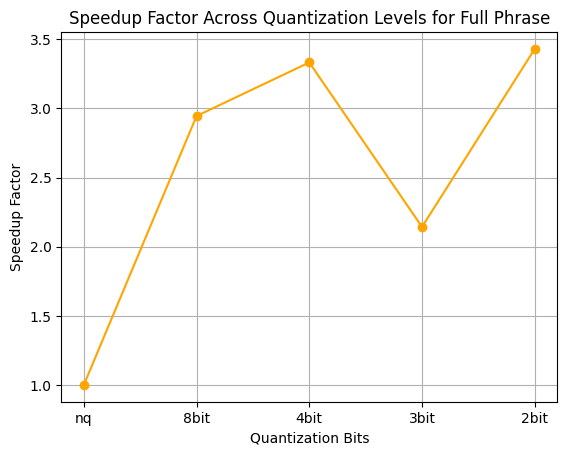

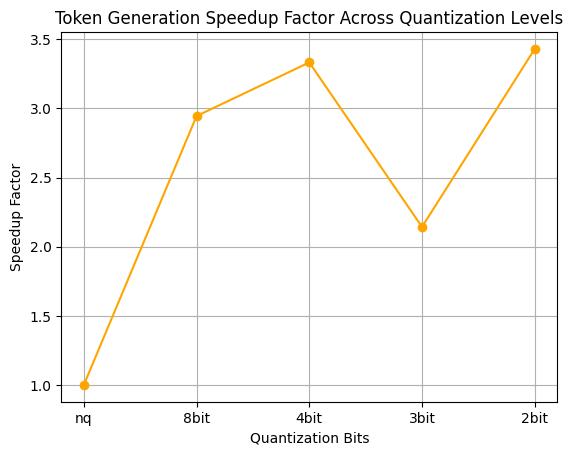

In [41]:
configurations = ["nq", "8bit", "4bit", "3bit", "2bit"]
speedups = utils_LM.print_speedup(quantized_times, configurations)

### Test trying out dynamic quantization (NOT SUPPORTED YET!)

In [8]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"
quant_path = "Llama-3.2-1B-Instruct-gptqmodel-wikiText-lowhigh-2bits-128gs"

tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the wikitext dataset
print("LOADING DATASET")
traindataset = get_wikitext2(tokenizer, nsamples=256, seqlen=1024)
print("DATASET LOADED")

# Choose number of bits for quantization
quant_config = QuantizeConfig(bits=4, 
                              dynamic={"layer_0":{"bits": 2},
                                       "layer_1":{"bits": 2},
                                       "layer_2":{"bits": 2},
                                       "layer_13":{"bits": 2},
                                       "layer_14":{"bits": 2},
                                       "layer_15":{"bits": 2}},
                              group_size=128)

print("LOADING MODEL")
model = GPTQModel.load(model_id, quant_config)
print("MODEL LOADED")

print("QUANTIZING...")
model.quantize(traindataset)

print("SAVING...")
model.save(quant_path)

LOADING DATASET
DATASET LOADED
LOADING MODEL


WARNING - GPTQModel's per-module `dynamic` quantization feature is currently not upstreamed to hf/vllm/sglang. If you're using vllm, you need to install this PR: https://github.com/vllm-project/vllm/pull/7086
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


MODEL LOADED
QUANTIZING...
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.62015', 'damp': '0.01000', 'time': '1.011', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.01660', 'damp': '0.01000', 'time': '1.090', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '1.27481', 'damp': '0.01000', 'time': '1.121', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00164', 'damp': '0.01000', 'time': '1.024', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '1.13952', 'damp': '0.01000', 'time': '1.098', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '1.43331', 'damp': '0.01000', 'time': '1.243', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00756', 'damp': '0.01000', 'time': '5.191', 'dynamic': None}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:01:03 / 0:08:24 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '1.05125', 'damp': '0.01000', 'time': '1.059', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.06222', 'damp': '0.01000', 'time': '1.099', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '2.02058', 'damp': '0.01000', 'time': '1.263', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00474', 'damp': '0.01000', 'time': '1.145', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '1.67261', 'damp': '0.01000', 'time': '1.129', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '2.29010', 'damp': '0.01000', 'time': '1.146', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '5.34262', 'damp': '0.01000', 'time': '6.612', 'dynamic': None}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:02:08 / 0:11:22 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '2.12595', 'damp': '0.01000', 'time': '1.091', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.14694', 'damp': '0.01000', 'time': '1.117', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '4.07088', 'damp': '0.01000', 'time': '1.284', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00613', 'damp': '0.01000', 'time': '1.149', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '2.17671', 'damp': '0.01000', 'time': '1.224', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '3.45201', 'damp': '0.01000', 'time': '1.209', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.02582', 'damp': '0.01000', 'time': '4.913', 'dynamic': None}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:03:11 / 0:12:44 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '1.39912', 'damp': '0.01000', 'time': '1.020', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.19148', 'damp': '0.01000', 'time': '1.080', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '3.05197', 'damp': '0.01000', 'time': '1.132', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.01248', 'damp': '0.01000', 'time': '1.108', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '2.57839', 'damp': '0.01000', 'time': '1.176', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '5.11010', 'damp': '0.01000', 'time': '1.264', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.03728', 'damp': '0.01000', 'time': '5.340', 'dynamic': None}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:04:14 / 0:13:32 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '1.43280', 'damp': '0.01000', 'time': '1.242', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.17095', 'damp': '0.01000', 'time': '1.183', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '2.95959', 'damp': '0.01000', 'time': '1.279', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.01937', 'damp': '0.01000', 'time': '1.196', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '2.51218', 'damp': '0.01000', 'time': '1.262', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '5.39985', 'damp': '0.01000', 'time': '1.213', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.04069', 'damp': '0.01000', 'time': '5.483', 'dynamic': None}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:05:19 / 0:14:10 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '2.18329', 'damp': '0.01000', 'time': '1.087', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.14264', 'damp': '0.01000', 'time': '1.208', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '3.71108', 'damp': '0.01000', 'time': '1.262', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.01934', 'damp': '0.01000', 'time': '1.146', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '2.63936', 'damp': '0.01000', 'time': '1.172', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '4.84909', 'damp': '0.01000', 'time': '1.167', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.04864', 'damp': '0.01000', 'time': '5.166', 'dynamic': None}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:06:23 / 0:14:35 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '1.64798', 'damp': '0.01000', 'time': '1.058', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.18048', 'damp': '0.01000', 'time': '1.034', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '2.62186', 'damp': '0.01000', 'time': '1.122', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.03082', 'damp': '0.01000', 'time': '1.063', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '2.65586', 'damp': '0.01000', 'time': '1.279', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '4.75568', 'damp': '0.01000', 'time': '1.269', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.04976', 'damp': '0.01000', 'time': '5.302', 'dynamic': None}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:07:26 / 0:14:52 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '1.62108', 'damp': '0.01000', 'time': '1.185', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.20533', 'damp': '0.01000', 'time': '1.211', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '3.06348', 'damp': '0.01000', 'time': '1.510', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.02703', 'damp': '0.01000', 'time': '1.219', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '2.70216', 'damp': '0.01000', 'time': '1.287', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '4.35683', 'damp': '0.01000', 'time': '1.228', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.05370', 'damp': '0.01000', 'time': '5.204', 'dynamic': None}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:08:29 / 0:15:04 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '1.90070', 'damp': '0.01000', 'time': '1.074', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.19343', 'damp': '0.01000', 'time': '1.044', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '3.12618', 'damp': '0.01000', 'time': '1.105', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.03416', 'damp': '0.01000', 'time': '1.052', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '2.95641', 'damp': '0.01000', 'time': '1.101', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '4.64130', 'damp': '0.01000', 'time': '1.101', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.07178', 'damp': '0.01000', 'time': '4.829', 'dynamic': None}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:09:31 / 0:15:13 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '1.53448', 'damp': '0.01000', 'time': '1.089', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.23521', 'damp': '0.01000', 'time': '1.196', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '3.75173', 'damp': '0.01000', 'time': '1.173', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.04647', 'damp': '0.01000', 'time': '1.150', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '3.10141', 'damp': '0.01000', 'time': '1.269', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '5.03681', 'damp': '0.01000', 'time': '1.352', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.08522', 'damp': '0.01000', 'time': '5.332', 'dynamic': None}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:10:36 / 0:15:25 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '1.84701', 'damp': '0.01000', 'time': '1.129', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.26163', 'damp': '0.01000', 'time': '1.229', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '3.86374', 'damp': '0.01000', 'time': '1.276', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.03124', 'damp': '0.01000', 'time': '1.132', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '3.72636', 'damp': '0.01000', 'time': '1.227', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '5.83562', 'damp': '0.01000', 'time': '1.346', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.11090', 'damp': '0.01000', 'time': '4.928', 'dynamic': None}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:11:38 / 0:15:30 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '2.30757', 'damp': '0.01000', 'time': '1.113', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.28020', 'damp': '0.01000', 'time': '1.093', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '3.93666', 'damp': '0.01000', 'time': '1.375', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.02647', 'damp': '0.01000', 'time': '1.158', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '4.23939', 'damp': '0.01000', 'time': '1.246', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '6.50507', 'damp': '0.01000', 'time': '1.194', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.12191', 'damp': '0.01000', 'time': '5.300', 'dynamic': None}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:12:42 / 0:15:37 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '2.37000', 'damp': '0.01000', 'time': '1.175', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.28516', 'damp': '0.01000', 'time': '1.207', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '3.99615', 'damp': '0.01000', 'time': '1.458', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.02574', 'damp': '0.01000', 'time': '1.101', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '4.43125', 'damp': '0.01000', 'time': '1.192', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '6.43990', 'damp': '0.01000', 'time': '1.252', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.13914', 'damp': '0.01000', 'time': '5.133', 'dynamic': None}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:13:46 / 0:15:44 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '2.34641', 'damp': '0.01000', 'time': '1.156', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.47876', 'damp': '0.01000', 'time': '1.161', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '4.60741', 'damp': '0.01000', 'time': '1.458', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.03186', 'damp': '0.01000', 'time': '1.223', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '5.23611', 'damp': '0.01000', 'time': '1.200', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '6.96745', 'damp': '0.01000', 'time': '1.255', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.20309', 'damp': '0.01000', 'time': '4.927', 'dynamic': None}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:14:50 / 0:15:49 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '2.65877', 'damp': '0.01000', 'time': '1.078', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '1.07698', 'damp': '0.01000', 'time': '1.102', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '4.87220', 'damp': '0.01000', 'time': '1.167', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.07266', 'damp': '0.01000', 'time': '1.054', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '5.98216', 'damp': '0.01000', 'time': '1.125', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '8.60316', 'damp': '0.01000', 'time': '1.142', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.27082', 'damp': '0.01000', 'time': '5.450', 'dynamic': None}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:15:53 / 0:15:53 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '2.53159', 'damp': '0.01000', 'time': '1.266', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '1.07410', 'damp': '0.01000', 'time': '1.234', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '4.43006', 'damp': '0.01000', 'time': '1.268', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.37833', 'damp': '0.01000', 'time': '1.212', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '7.47184', 'damp': '0.01000', 'time': '1.192', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '9.86230', 'damp': '0.01000', 'time': '1.264', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.65468', 'damp': '0.01000', 'time': '4.936', 'dynamic': None}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.62015', 'damp': '0.01000', 'time': '1.011', 'dynamic': None}, {'la

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%4 / 1:22:08 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING...


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1485.55MB, 1.45GB
INFO - Size difference: 3228.77MB, 3.15GB - 68.49%


In [7]:
def get_wikitext2(tokenizer, nsamples, seqlen):
    traindata = load_dataset("wikitext", "wikitext-2-raw-v1", split="train").filter(
        lambda x: len(x["text"]) >= seqlen)

    return [tokenizer(example["text"]) for example in traindata.select(range(nsamples))]



model_id = "meta-llama/Llama-3.2-1B-Instruct"
quant_path = "Llama-3.2-1B-Instruct-gptqmodel-wikiText-lowhigh-4bits-128gs"

tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the wikitext dataset
print("LOADING DATASET")
traindataset = get_wikitext2(tokenizer, nsamples=256, seqlen=1024)
print("DATASET LOADED")

# Choose number of bits for quantization
quant_config = QuantizeConfig(bits=2, 
                              dynamic={"layer_0":{"bits": 4},
                                       "layer_1":{"bits": 4},
                                       "layer_2":{"bits": 4},
                                       "layer_13":{"bits": 4},
                                       "layer_14":{"bits": 4},
                                       "layer_15":{"bits": 4}},
                              group_size=128)

print("LOADING MODEL")
model = GPTQModel.load(model_id, quant_config)
print("MODEL LOADED")

print("QUANTIZING...")
model.quantize(traindataset)

print("SAVING...")
model.save(quant_path)

LOADING DATASET
DATASET LOADED
LOADING MODEL


WARNING - GPTQModel's per-module `dynamic` quantization feature is currently not upstreamed to hf/vllm/sglang. If you're using vllm, you need to install this PR: https://github.com/vllm-project/vllm/pull/7086
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


MODEL LOADED
QUANTIZING...
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%-------------| 100.0%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '19.09693', 'damp': '0.01000', 'time': '1.307', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.46131', 'damp': '0.01000', 'time': '1.580', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '39.25892', 'damp': '0.01000', 'time': '1.933', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.05174', 'damp': '0.01000', 'time': '1.260', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '32.38487', 'damp': '0.01000', 'time': '1.483', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '40.97060', 'damp': '0.01000', 'time': '1.352', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.30735', 'damp': '0.01000', 'time': '8.197', 'dynamic': None}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:01:16 / 0:10:08 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '36.86479', 'damp': '0.01000', 'time': '1.295', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '2.03966', 'damp': '0.01000', 'time': '1.269', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '67.49049', 'damp': '0.01000', 'time': '1.540', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.15789', 'damp': '0.01000', 'time': '1.328', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '52.43117', 'damp': '0.01000', 'time': '1.328', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '72.22403', 'damp': '0.01000', 'time': '1.347', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '212.30051', 'damp': '0.01000', 'time': '7.341', 'dynamic': None}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:02:26 / 0:12:58 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '54.40914', 'damp': '0.01000', 'time': '1.159', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '3.74864', 'damp': '0.01000', 'time': '1.319', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '107.65938', 'damp': '0.01000', 'time': '1.408', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.17256', 'damp': '0.01000', 'time': '1.249', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '59.95652', 'damp': '0.01000', 'time': '1.330', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '96.12019', 'damp': '0.01000', 'time': '1.395', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.76375', 'damp': '0.01000', 'time': '5.759', 'dynamic': None}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:03:36 / 0:14:24 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '42.56176', 'damp': '0.01000', 'time': '1.222', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '5.48530', 'damp': '0.01000', 'time': '1.131', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '93.50783', 'damp': '0.01000', 'time': '1.348', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.36951', 'damp': '0.01000', 'time': '1.227', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '77.42223', 'damp': '0.01000', 'time': '1.309', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '153.97868', 'damp': '0.01000', 'time': '1.334', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '1.07931', 'damp': '0.01000', 'time': '5.580', 'dynamic': None}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:04:43 / 0:15:05 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '48.62070', 'damp': '0.01000', 'time': '1.102', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '5.62872', 'damp': '0.01000', 'time': '1.277', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '101.88032', 'damp': '0.01000', 'time': '1.309', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.53582', 'damp': '0.01000', 'time': '1.180', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '82.78470', 'damp': '0.01000', 'time': '1.291', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '178.24561', 'damp': '0.01000', 'time': '1.218', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '1.20836', 'damp': '0.01000', 'time': '5.721', 'dynamic': None}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:05:50 / 0:15:33 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '72.34142', 'damp': '0.01000', 'time': '1.233', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '4.96326', 'damp': '0.01000', 'time': '1.266', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '127.78267', 'damp': '0.01000', 'time': '1.465', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.48482', 'damp': '0.01000', 'time': '1.239', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '89.75452', 'damp': '0.01000', 'time': '1.280', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '165.60542', 'damp': '0.01000', 'time': '1.310', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '1.42982', 'damp': '0.01000', 'time': '5.935', 'dynamic': None}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:06:56 / 0:15:50 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '66.57173', 'damp': '0.01000', 'time': '1.160', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '6.90838', 'damp': '0.01000', 'time': '1.213', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '103.02229', 'damp': '0.01000', 'time': '1.443', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.73935', 'damp': '0.01000', 'time': '1.176', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '93.53851', 'damp': '0.01000', 'time': '1.246', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '168.59760', 'damp': '0.01000', 'time': '1.205', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '1.52126', 'damp': '0.01000', 'time': '5.331', 'dynamic': None}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:08:04 / 0:16:08 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '68.15274', 'damp': '0.01000', 'time': '1.269', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '8.21005', 'damp': '0.01000', 'time': '1.359', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '126.88686', 'damp': '0.01000', 'time': '1.417', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.69859', 'damp': '0.01000', 'time': '1.282', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '101.79463', 'damp': '0.01000', 'time': '1.305', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '164.67075', 'damp': '0.01000', 'time': '1.480', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '1.71372', 'damp': '0.01000', 'time': '5.665', 'dynamic': None}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:09:09 / 0:16:16 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '83.09605', 'damp': '0.01000', 'time': '1.056', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '8.27943', 'damp': '0.01000', 'time': '1.090', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '136.34792', 'damp': '0.01000', 'time': '1.247', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.88787', 'damp': '0.01000', 'time': '1.066', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '115.34420', 'damp': '0.01000', 'time': '1.306', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '180.39226', 'damp': '0.01000', 'time': '1.234', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '2.09715', 'damp': '0.01000', 'time': '5.467', 'dynamic': None}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:10:16 / 0:16:25 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '67.81458', 'damp': '0.01000', 'time': '1.158', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '9.73784', 'damp': '0.01000', 'time': '1.222', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '163.47119', 'damp': '0.01000', 'time': '1.236', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '1.50253', 'damp': '0.01000', 'time': '1.201', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '126.68941', 'damp': '0.01000', 'time': '1.235', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '204.89243', 'damp': '0.01000', 'time': '1.254', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '2.52216', 'damp': '0.01000', 'time': '6.186', 'dynamic': None}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:11:22 / 0:16:32 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '82.45460', 'damp': '0.01000', 'time': '1.146', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '10.06012', 'damp': '0.01000', 'time': '1.162', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '170.99786', 'damp': '0.01000', 'time': '1.280', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '1.40609', 'damp': '0.01000', 'time': '1.167', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '156.58453', 'damp': '0.01000', 'time': '1.192', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '245.30774', 'damp': '0.01000', 'time': '1.165', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '3.59580', 'damp': '0.01000', 'time': '5.216', 'dynamic': None}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:12:24 / 0:16:32 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '101.18745', 'damp': '0.01000', 'time': '1.109', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '10.71881', 'damp': '0.01000', 'time': '1.086', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '171.41113', 'damp': '0.01000', 'time': '1.211', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.96878', 'damp': '0.01000', 'time': '1.167', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '182.05957', 'damp': '0.01000', 'time': '1.208', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '279.54022', 'damp': '0.01000', 'time': '1.195', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '4.49245', 'damp': '0.01000', 'time': '4.924', 'dynamic': None}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:13:26 / 0:16:32 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '101.17583', 'damp': '0.01000', 'time': '1.258', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '11.13061', 'damp': '0.01000', 'time': '1.094', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '178.35132', 'damp': '0.01000', 'time': '1.370', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '1.16959', 'damp': '0.01000', 'time': '1.133', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '204.14920', 'damp': '0.01000', 'time': '1.166', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '296.78693', 'damp': '0.01000', 'time': '1.212', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '6.06321', 'damp': '0.01000', 'time': '4.831', 'dynamic': None}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:14:29 / 0:16:33 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '105.29068', 'damp': '0.01000', 'time': '1.425', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '18.21948', 'damp': '0.01000', 'time': '1.248', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '202.43713', 'damp': '0.01000', 'time': '1.235', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '1.90113', 'damp': '0.01000', 'time': '1.115', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '242.23315', 'damp': '0.01000', 'time': '1.287', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '320.23163', 'damp': '0.01000', 'time': '1.174', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '8.86607', 'damp': '0.01000', 'time': '5.001', 'dynamic': None}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:15:33 / 0:16:35 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '101.26169', 'damp': '0.01000', 'time': '1.108', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '35.88216', 'damp': '0.01000', 'time': '1.057', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '197.84312', 'damp': '0.01000', 'time': '1.304', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '4.77762', 'damp': '0.01000', 'time': '1.043', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '260.32599', 'damp': '0.01000', 'time': '1.133', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '373.81982', 'damp': '0.01000', 'time': '1.147', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '10.36318', 'damp': '0.01000', 'time': '4.972', 'dynamic': None}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:16:36 / 0:16:36 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '89.58504', 'damp': '0.01000', 'time': '1.069', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '38.14777', 'damp': '0.01000', 'time': '1.034', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '179.24437', 'damp': '0.01000', 'time': '1.125', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '11.66528', 'damp': '0.01000', 'time': '1.150', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '321.88214', 'damp': '0.01000', 'time': '1.201', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '427.45874', 'damp': '0.01000', 'time': '1.283', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '23.61764', 'damp': '0.01000', 'time': '5.204', 'dynamic': None}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '19.09693', 'damp': '0.01000', 'time': '1.307', 'dynamic': 

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%4 / 1:22:08 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING...


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1251.74MB, 1.22GB
INFO - Size difference: 3462.58MB, 3.38GB - 73.45%
